## EconEval: Economic evaluations of health interventions in python 
## The creation story

### Why?

Economic evaluation of health interventions are often complex and time-consuming. The aim of this package is to provide tools that are easy to use, flexible, fast, and reproducible.   

### Example

In [3]:
# define a model
hip = nx.DiGraph()

# add states to the model
states = [('healthy', {'utility':0.9, 'cost': 0}),
          ('dead', {'utility':0, 'cost': 0}),
          ('sick', {'utility':0.7, 'cost': 1000})]
hip.add_nodes_from(states)

# add transition probabilities
transitions = [('healthy', 'healthy', {'p':0.98}),
               ('healthy', 'sick', {'p':0.01}),
               ('healthy', 'dead', {'p':0.01}),
               ('sick', 'sick', {'p':0.5}),
               ('sick', 'dead', {'p':0.3}),
               ('sick', 'healthy', {'p':0.2}),
               ('dead', 'dead', {'p':1})]

hip.add_edges_from(transitions)

# analyse
#hip.cost_per_qualy()
#hip.psa()
#hip.evpi()
#hip.time='M'




## Using directed graphs and networkx as a language to express a model

## Example. A simple markov model

A markov model consists of a number of states and transition probabilities between the states. Each state is associated with other variables (like costs and utility) and each transition is associated with a probability (and possibly other variables). This can all be expressed concisely using the language of a directed graph in using the networkx package in python.

In [7]:
import networkx as nx
import pandas as pd

#import pydot as pydot

In [2]:
# initialize a model (here called g)
g = nx.DiGraph()

In [3]:
# add states and transitions (called nodes and edges in networkx)
# note that we can also add other variables (like costs and utility) to the nodes and the edges (and the graph itself)

g.add_node('healthy', u=0.8, p=0.9, c=100000)
g.add_node('sick', u=0.3, p=0.8, c=3000)
g.add_node('dead', u=0)

g.add_edge('healthy', 'healthy', p=0.98)
g.add_edge('healthy', 'sick', p=0.01)
g.add_edge('healthy', 'dead', p=0.01)

g.add_edge('sick', 'sick', p=0.5)
g.add_edge('sick', 'dead', p=0.3)
g.add_edge('sick', 'healthy', p=0.2)

g.add_edge('dead', 'dead', p=1)

In [20]:
# instead of adding one node (state) at a time, we could add all at once like this
g = nx.DiGraph()

states = ['healthy', 'dead', 'sick']
g.add_nodes_from(states)
         
           
# adding notes with attributes
states = [('healthy', {'u':0.8, 'c':0}), 
          ('dead',  {'u':0, 'c':0}),
            ('sick', {'u':0.2, 'c':1000})]
           
g.add_nodes_from(states)

# adding (or revising) same attribute to many nodes
g.add_nodes_from(['dead','sick'], color='white')

#adding edges between nodes (with probabilities)
transitions = [('healthy', 'healthy', {'p':0.98}),
               ('healthy', 'sick', {'p':0.01}),
               ('healthy', 'dead', {'p':0.01}),
               ('sick', 'sick', {'p':0.5}),
               ('sick', 'dead', {'p':0.3}),
               ('sick', 'healthy', {'p':0.2}),
               ('dead', 'dead', {'p':1})]

g.add_edges_from(transitions)

In [5]:
g = hip

NameError: name 'hip' is not defined

In [6]:
# and we can easily delete and add states and transitions to the existing model

g.add_node('very_dead')
g.remove_node('very_dead')
g.add_edge('dead', 'healthy')
g.remove_edge('dead', 'healthy')

In [7]:
# revise a property (edges)

g['healthy']['healthy']['p']=0.98

In [8]:
# revise a property (nodes)

g.node['healthy']['c'] = 50

Note. Adding, deleting and revising may make the probabilities in the transition matrix sum to more or less than one, so the probabilities should be adjusted after revisions (and this can be done automatically)

In [9]:
# pro exercise: we can also pick all states starting from specific state and delete all (i.e. a whole sub-graph) 
# pro exercise: use weighted edges: g.add_weighted_edges_from([('healthy','healthy',0.8)])
# for more, see: https://networkx.readthedocs.io/en/stable/tutorial/tutorial.html

In addition to assigning variables to nodes and edges, it is possible to assign model specific information to the graph itself

In [10]:
# set time scale to "annual" (defined as 365 days)
g.graph['time_scale_txt'] = 'A' 
g.graph['time_scale_num'] = 365

# define characteristics of agents and their starting values 
# note: it is possible to include functions and not just constants
g.graph['agent']={'age' : 5 ,'male' : 'np.random.binomial(1, p=0.4)'}

In [ ]:
# determine the information that should be traced and kept for analysis

trace
    - model_var: function (mean, sum, var, own defined)
    - agent_var: variable names to be traced (for all agents)

    - allow convenience function (all translated back?)
        many vars : many functions = all functions for all vars
        function : vars (apply function to all vars)
        var : functions
        matrix of var functions (with checks where relevant)
        name: function
        allow turning off automatic tracin (ie. use only custom tracing)
        
trace {'num_agents': ['sick', 'healthy', 'dead'],
      'mean' : ['age', 'gender']
       'agent_vars'
sparse recorder?
       dictionary recorders
       
       agg, sum, mean
       :
      }

sparse recorders for agents (record only steps in that state, for each agent)

self.in_state['sick'] = [2,3,7,8,11,15,16]
or even more sparce: record only changes in states [1:healthy, 8: sick, 11: healthy, 20: dead]
(may also extract get this from a dataframe after)
maybe allow function calls and many vars to be recorded (sparcely?)
(tied to events/state, changes and or other things? when a mean aggregate crosses a thrsehold, recor age of all ... well perhaps this is a making it too complicated
)

well, what about record when moves in a grid ... not just when states change?


easier to allow:
for changes in state (maybe only from and to some states i.e. even more sparse recording like only record when they enter into sick ...)
record value fo some variables (and not a function of these variables, but allow many variables to be recorded, both model and agent vars ... so model vars could be functions if included in model)

so: for all agents switching from x to y (or just for all agents changes involving x), record ...

or, simplify first:
for each change, record (in the agent class? or record it in a table directly, well perhaps agent since the recorded hisotory can be useful fo determine future behaviour): {model time: set of epcified vars}

so syntax:
record changes involving from state to states (defaul all)
or: record all state changes, except (explicit list of both from and to states, ok, this last conodition may be verbose, but that is ok)

allow both: record_only (implicit none, only specified) and record_except (implicit all, exccpet), but the two may conflict which is probably not a good syntax (althou certainly practical)

on_state_change_record (too long)
(btw: look like javascript, establishes listeners. on_click, ...)
could do that. add it to states:
state.on_change() (added to node list)

maybe messy

how about this for a start

record_agent_state_changes(agent_vars=list, model_vars, except_states=list, except_between=list of tuples, special_exceptions=only of age ia above 35 etc?, record_in=['self', 'table', 'both'], table_name_to_record_in='text', or self.name to record in (well use "recorded_history" or just "state_history" or just "history, well, should prevent overwriting other self.vars the user may have used ... self.history may well be used already ... this problem applies to applies to all my "standard" self variables ...)

more general?
trigger_record(conditions, function to be called)

a class of triggers
- state change
- other change (an aggregate variable reaches a threshold)
(agent vs. model triggers)

record_model_changes([{condition, function}])

use established terminology?

monitor.model()
monitor.agents()
monitor.states()
monitor.state_changes()

on_state_change_record()
on_var_change_record()

trace_state_changes
trace_state_history
trace_change

record_state_changes

could make it more general. make traces and then "add" all traces things to a model(or agent?) level trace object that keeps track of all changes to be recorded, ant this trace has to have triggers to be activated/registered?


trigger_recording([{state_change: function},{model_var_condition: function} ...)

or 
trace_triggers
or 
recording_triggers
or
trigger_monitors
or just
triggers
or
recording_triggers
or
record_on.state_change
record_on.model_var_change
or
record_when
monitor_when

agent recorders, agent triggers, model recorders, model triggers .... mix ...
record what and when (and what logic should come first, or use both?)

record.agent.state_changes
record.agent.conditions (eg, record some value when agent age turns 18)
record.model.conditions

record.triggers
record.trigger.agent (value, state_change, position change, complex conditionos ex. record on collison with x ...)
state.change is an attrobute change .. juslt like age is an attribute change going from healthy to sicj is an attribute change 

listen for attribute changes (agentvars and model vars)
when change, register if ... and except
if register, then register this

listen(agent attribute, condition, function)

on_change(attribute, function)

on_agent_change
on_model_change

but the whole pooint is to provide some easy convenience functons AND SPEED (so not loop many thing in someting that is already nested)...

could just make a standard and then use convinience functionsto  create the more complicated "true" expressions to be used?

record_state_changes()
record_states( ... "only changes")
monitor_sparsely
monitor_changes.
monitor_trigger

record.trigger.agent_state.changes
record.trigger.agent.threshold_values
record.trigger.agent.complex_condition

record.state_changes(list of states to be included, default all,
            except_states, except_between, negate_inclusion=False,
            except_agent_conditions,
            except_model_conditions,    
            record = agent variables to be recorded,
            store_record_in='self' or 'table' or 'both'
            record_under_name= name of self variable or table name)

record.agent_state.changes


recorders


this formulation is flexible, allow for future and more complicated triggers
trace_trigger.add() (or remove)

etc..









In [8]:
#def record_state_changes(include, exclude, record, exclude_between, agent_conditions = None, model_conditions=None):
    
    
#ok, too complicated for the language expressions .. couold work at code level (add a class or a method or something to the code lvel to make it easier)

#record all state changes for the agent (when and to what)
g.record_state_changes = True

# record
g.recorded_variables = ['age', 'wealth']

g.record_agent_variables = ['wealth']

g.record_at_state_change = ['age', 'wealth']

#default; at state change, record all individual vars ?



In [16]:
model.sum_agents['healthy']

self.time_in
self.cumulative_time['sick']
self.state
self.state_history

def update_agent_history(self, new_state):
      
    if new_state == self.state
        self.time_in[self.state] +=1
        self.cumulative_time[self.state] +=1
        continue
    else:
        self.previous_state = self.state
        self.state = new_state
        self.state_history.append({self.cycle:new_state})
        
        # may allow self.age or some other variable here
        # may also allow recording triggered by other changes than state?
        self.model.sum_agents[self.previous_state] += 1
        self.model.sum_agents[new_state] += 1
        #self.model.qaly = self.model.sum_agents['state'] * utility[state] ...
        #trace average age in states?
        #allow new state to be selected before transver and the agent may then behave knowing her new state? rational expectatons etc
        
        
    





#g.graph['trace_time_in'] = ['sick', 'healthy', 'dead']
#g.graph['trace_agents_in'] = ['sick', 'healthy', 'dead']
#g.graph['trace_aggregates']={'age': 'mean', 'gender' : 'mean'}
g.graph['agent_trace']=[{var_name: function}]
g.graph['model_trace']=[{var_name: function}]
g.graph['trace'] = True # allow user to turn off automatic traces



#function will need variables, allow creation of more complex vars tjat record history, not just currrent self vars
                         

# more general. have: trace(record, monitor) as a subheading, and "meta" as another general category, and "data" as a third?

In [9]:
# These properties can be accesses using the following notation

g.graph['agent']['age']

5

In [17]:
g.graph['trace_aggregates']['age']

'mean'

In [14]:
# adding a dataframe with information to the model (for instance mortality tables)
df = pd.DataFrame.from_dict({'a': [0.9, 0.12, 0.18], 'b': [0.36, 0.563, 0.35]})
g.graph['mortality'] = df

In [15]:
g.graph['mortality']

,a,b
0,0.90,0.360
1,0.12,0.563
2,0.18,0.350


In [9]:
from nxpd import draw

In [ ]:
layouts=['neato','dot','twopi','circo','fdp','nop', 'wc','acyclic','gvpr',
        'gvcolor','ccomps','sccmap','tred']

In [3]:
interact(draw,g=fixed(g), show=fixed('ipynb'), format = 'png')

NameError: name 'interact' is not defined

In [18]:
# see all transitions from a state

g.edges('healthy')

[('healthy', 'sick'), ('healthy', 'healthy'), ('healthy', 'dead')]

### Adding notes and edges can also be done in without programming

In [5]:
from ipywidgets import interactive, interact, interact_manual, fixed
from IPython.display import display

In [10]:
# Use ipython widgets to create a graphical interface
g = nx.DiGraph()

def add_node(state='testtext',g=g):
    g.add_node(state)
    return draw(g, show='ipynb', format = 'png')

interact_manual(add_node, g=fixed(g))

<function __main__.add_node>

In [22]:
def connect_nodes(g=g, from_node=g.nodes(), to_node=g.nodes(), pbox=0.3):
    g.add_edge(from_node, to_node, p=pbox)
    return draw(g, show='ipynb', format = 'png')

In [23]:
interact_manual(connect_nodes, g=fixed(g))

<function __main__.connect_nodes>

In [29]:
def model_widget():
    g = nx.DiGraph()
    states=['healthy']
    g.add_node('healthy')
    new_state_widget = widgets.Text()
    connect_states = widgets.Box()
    from_state = widgets.Dropdown(options=states)
    to_state = widgets.Dropdown(options=states)
    pr_widgets = widgets.FloatSlider()
    visualization_widget = widgets.Image()
    
    def add_state():
        g.add_node(new_state_widget.value())
        
    return g

    new_state_widget.on_submit(add_state)
    
    vis = draw(g, format = 'png')
    visualization_widget.value = vis
    test_box = widgets.Hbox([new_state_widget, visualization_widget])
    
    return test_box

In [30]:
display(model_widget())

In [9]:
def make_agent_text(g, var='agent'):
    all_text=[]
    alltextstr = ""
    for k, v in g.graph[var].items():
        text = 'self.{k} = {v}\n'.format(k=k, v=v)
        all_text.append(text)
        alltextstr += text
    all_text = str(all_text)
    all_text = all_text.replace("'","\n")
    return alltextstr

print(make_agent_text(g, var='agent'))

self.age = 5
self.male = np.random.binomial(1, p=0.4)



In [10]:
def make_states_text(g):
    text = str()
    for node in g.nodes():
        text += "elif self.status=='{rep}': self = from_{rep}(self)\n".format(rep=node)
    print(text)
make_states_text(g)

elif self.status=='sick': self = from_sick(self)
elif self.status=='healthy': self = from_healthy(self)
elif self.status=='dead': self = from_dead(self)



In [11]:
def make_func_text(g):
    funk_text1 ="""def from_{node1}(self):"""
    funk_text2 ="""    def pr_{node1}_{node2}(self): return {pr}"""
    funk_text3 ="""    select_state = np.random.choice({states}, 
                                    size=1, 
                                    p={pr_list})
    return select_state[0]
    """
    for node in g.nodes():
        print(funk_text1.format(node1=node))
        for node1, node2 in g.edges(node):
            print(funk_text2.format(node1=node1, node2=node2, pr=g[node1][node2]['p']))
        states = [node2 for node1, node2 in g.edges(node)]
        pr_list = ['pr_{node1}_{node2}(self)'.format(node1=node1, node2=node2) for node1, node2 in g.edges(node)]
        pr_list = str(pr_list)
        pr_list = pr_list.replace("'","")
        #pr_list = [value['p'] for key,value in g[node].items()]
        print(funk_text3.format(states=states, pr_list=pr_list))
make_func_text(g)

def from_sick(self):
    def pr_sick_sick(self): return 0.5
    def pr_sick_healthy(self): return 0.2
    def pr_sick_dead(self): return 0.3
    select_state = np.random.choice(['sick', 'healthy', 'dead'], 
                                    size=1, 
                                    p=[pr_sick_sick(self), pr_sick_healthy(self), pr_sick_dead(self)])
    return select_state[0]
    
def from_healthy(self):
    def pr_healthy_sick(self): return 0.01
    def pr_healthy_healthy(self): return 0.98
    def pr_healthy_dead(self): return 0.01
    select_state = np.random.choice(['sick', 'healthy', 'dead'], 
                                    size=1, 
                                    p=[pr_healthy_sick(self), pr_healthy_healthy(self), pr_healthy_dead(self)])
    return select_state[0]
    
def from_dead(self):
    def pr_dead_dead(self): return 1
    select_state = np.random.choice(['dead'], 
                                    size=1, 
                                    p=[pr_dead_dead(

In [25]:
def count_agents(self):
    agents_in=defaultdict(int)
    for agent in self.model.num_agents:
        agents_in[state] +=1
    return agents_in

# simple, but inefficient way of recording number of agents in each state
# two more efficient alternatives: 
# keep a specific count variable (disadvantage: must keep track)
# keep a list (same disadvantage)

# trace var: whats
# trace what: vars
# trace vars: whats
# trace whats: vars

# trace num_agents_in, mean : healthy, sick, dead, age
# hmmm
# trace mean_attribute_of_agents (what attribute and in what states?)


In [ ]:
agent_auto_trace_text = """
# trace agent information

self.state = None
self.time_in = 0

self.previous_state = None
self.time_in_previous_state = 0

self.cumulative_time = defaultdict()
self.state_history = defaultdict()

"""

model_auto_trace_text = """
# model trace info
self.sum_agents = defaultdict()
"""

make_model_datacollector_text = """
        # datacollector_text
        self.datacollector = DataCollector(
            model_reporters={"{state}": count_agents, {state},
            agent_reporters={"Wealth": lambda a: a.wealth})"""


datacollector_text = """
        # datacollector_text
        self.datacollector = DataCollector(
            model_reporters={"{state}": count_agents, {state},
            agent_reporters={"Wealth": lambda a: a.wealth})"""

def count_agents(self, state):
    return self.model.num_agents['state']

def update_agent_history(self, new_state):
      
    if new_state == self.state
        self.time_in[self.state] +=1
        self.cumulative_time[self.state] +=1
        continue
    else:
        self.previous_state = self.state
        self.state = new_state
        self.state_history.append({self.model_cycle : new_state})
        
        # may allow self.age or some other variable here
        #may also allow recording triggered by other changes than state?
        self.model.sum_agents[self.previous_state] += 1
        self.model.sum_agents[new_state] += 1
        #self.model.qaly = self.model.sum_agents['state'] * utility[state] ...
        #trace average age in states?
        #allow new state to be selected before transver and the agent may then behave knowing her new state? rational expectatons etc
        
        
    

In [22]:
model_text = """
    class Person(Agent):
       
        def __init__(self, unique_id, model):
            super().__init__(unique_id, model)
            {agent_attributes_text}

        def step(self):
            {states_text}
            {agent_auto_trace_text}

    # Models step function 
    class Disease(Model):
       
        def __init__(self, N):
            {model_vars}
            self.schedule = RandomActivation(self)
            self.state = None
            
            {model_auto_trace_text}

            # Create agents
            for i in range(self.num_agents):
                a = Person(i, self)
                self.schedule.add(a)

            # Store data after each step
            {model_auto_datacollector_text}

            
        def step(self):
            # store data 
            self.datacollector.collect(self)
            
            # make schedule
            self.schedule.step()

"""


In [23]:
def make_model_text(g):
    states_text = make_states_text(g)
    func_text = make_func_text(g)
    text = (func_text) + (model_text.format(states_text=states_text)) 
    return text

In [40]:
make_model_text(g)

elif self.status=='sick': self = from_sick(self)
elif self.status=='healthy': self = from_healthy(self)
elif self.status=='dead': self = from_dead(self)

def from_sick(self):
    def pr_sick_sick(self): return 0.5
    def pr_sick_healthy(self): return 0.2
    def pr_sick_dead(self): return 0.3
    select_state = np.random.choice(['sick', 'healthy', 'dead'], 
                                    size=1, 
                                    p=[pr_sick_sick(self), pr_sick_healthy(self), pr_sick_dead(self)])
    return select_state[0]
    
def from_healthy(self):
    def pr_healthy_sick(self): return 0.01
    def pr_healthy_healthy(self): return 0.98
    def pr_healthy_dead(self): return 0.01
    select_state = np.random.choice(['sick', 'healthy', 'dead'], 
                                    size=1, 
                                    p=[pr_healthy_sick(self), pr_healthy_healthy(self), pr_healthy_dead(self)])
    return select_state[0]
    
def from_dead(self):
    def pr_dead_dead(self):

KeyError: 'self_characteristics_text'

In [41]:
print(model_text)


    class Person(Agent):
       
        def __init__(self, unique_id, model):
            super().__init__(unique_id, model)
            {self_characteristics_text}

        def step(self):
            {states_text}
            

    # Models step function 
    class Disease(Model):
       
        def __init__(self, N):
            {model_vars}
            self.schedule = RandomActivation(self)

            # Create agents
            for i in range(self.num_agents):
                a = Person(i, self)
                self.schedule.add(a)

            # Store data after each step
            self.datacollector = DataCollector(
                model_reporters={'deaths': count_deads})   

        def step(self):
            # store data 
            self.datacollector.collect(self)

            # make schedule
            self.schedule.step()




In [47]:
pr_sick_healthy()

0.2

In [175]:
g['sick']

{'dead': {'p': 0.3}, 'healthy': {'p': 0.2}, 'sick': {'p': 0.5}}

In [51]:
a, b = g.edges('healthy')[0]
a

'healthy'

In [136]:
g['sick']

{'dead': {'p': 0.3}, 'healthy': {'p': 0.2}, 'sick': {'p': 0.5}}

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon.markov import MarkovChain

In [22]:
P = nx.to_numpy_matrix(g, weight = 'u')
P

matrix([[ 1.,  0.,  0.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])

In [29]:
[g.node[state]['u'] for state in g.nodes()]

[0, 0.2, 0.8]

In [30]:
nx.get_node_attributes(g,'u')

{'dead': 0, 'healthy': 0.8, 'sick': 0.2}

In [42]:
#manually specify nodelist order
nodeorder = ['healthy', 'sick', 'dead']
P = nx.to_numpy_matrix(g, nodelist = nodeorder, weight = 'p')
P

matrix([[ 0.98,  0.01,  0.01],
        [ 0.2 ,  0.5 ,  0.3 ],
        [ 0.  ,  0.  ,  1.  ]])

In [46]:
mc = MarkovChain(P, state_values = ['healthy', 'sick', 'dead'])

In [49]:
mc.simulate(ts_length = 100, init = 'healthy')

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'sick', 'sick', 'sick', 'dead', 'dead', 'dead', 'dead', 'dead',
       'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead',
       'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead',
       'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead',
       'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dea

In [50]:
def simulate(model, individuals, ts_length, init):
    results = pd.DataFrame()
    results_sum = pd.DataFrame()
    for individual in range(individuals):
        a = model.simulate(ts_length = ts_length, init = init)
        results[individual] = a
    return results

In [51]:
many = simulate(mc, 100, 50, 'healthy')

In [52]:
ts_length = 50
sum_many = pd.DataFrame(index = nodeorder)
print(sum_many)

for period in range(ts_length):
    x = many.iloc[period,:].value_counts()
    #print(x)
    sum_many[period] = x

Empty DataFrame
Columns: []
Index: [healthy, sick, dead]


<IPython.core.display.Javascript object>


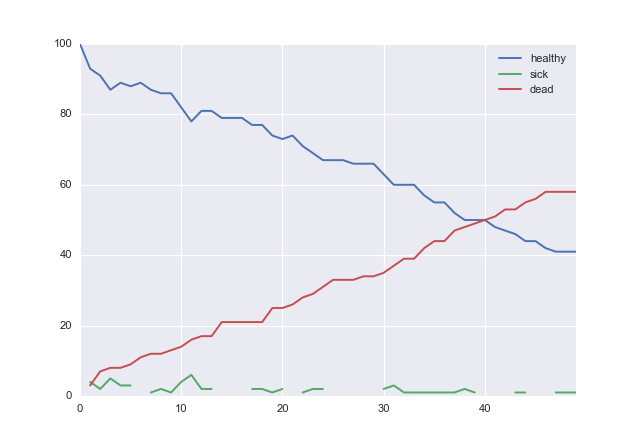

In [53]:
sum_many.T.plot()

In [17]:
nx.to_dict_of_dicts(g)

{'dead': {'dead': {'p': 1}},
 'healthy': {'dead': {'p': 0.01}, 'healthy': {'p': 0.98}, 'sick': {'p': 0.01}},
 'sick': {'dead': {'p': 0.3}, 'healthy': {'p': 0.2}, 'sick': {'p': 0.5}}}

In [60]:
g.nodes(data = True)

[('sick', {'p': 0.8, 'u': 0.3}),
 ('healthy', {'p': 0.9, 'u': 0.8}),
 ('dead', {'u': 0})]

In [19]:
nx.to_dict_of_dicts(g)

{'dead': {'dead': {'p': 1}},
 'healthy': {'dead': {'p': 0.01}, 'healthy': {'p': 0.98}, 'sick': {'p': 0.01}},
 'sick': {'dead': {'p': 0.3}, 'healthy': {'p': 0.2}, 'sick': {'p': 0.5}}}

In [62]:
import pykov
T = pykov.Matrix()

In [63]:
T = pykov.Chain({('h','h'): .98, ('h','s'): .01, ('h','d'): .01,
                 ('s', 's'): 0.5, ('s', 'h'): 0.2, ('s', 'd'): 0.3,
                ('d', 'd'): 1.0})

In [64]:
p = pykov.Vector(h = 1)

In [65]:
p

Vector([('h', 1)])

In [68]:
#probability distribution after n steps
a = T.pow(p, 2)
a

Vector([('s', 0.014800000000000001),
        ('d', 0.022800000000000001),
        ('h', 0.96239999999999992)])

In [70]:
def simulatepykov(chain, ts_length):
    p = pykov.Vector(h = 1)
    a = chain.pow(p, 1)
    tmp = pd.DataFrame(index = list(a.keys()))
    #print(tmp)
    for period in range(ts_length):
        tmp[period] = pd.Series(dict(chain.pow(p, period)))
        #print(tmp[period])
    return tmp 

In [74]:
c = simulatepykov(chain = T, ts_length = 50)
c.T

,s,d,h
0,NaN,NaN,1.000000
1,0.010000,0.010000,0.980000
2,0.014800,0.022800,0.962400
3,0.017024,0.036864,0.946112
4,0.017973,0.051432,0.930595
5,0.018293,0.066130,0.915577
6,0.018302,0.080774,0.900924
7,0.018160,0.095274,0.886566
8,0.017946,0.109587,0.872467
9,0.017698,0.123696,0.858607


<IPython.core.display.Javascript object>


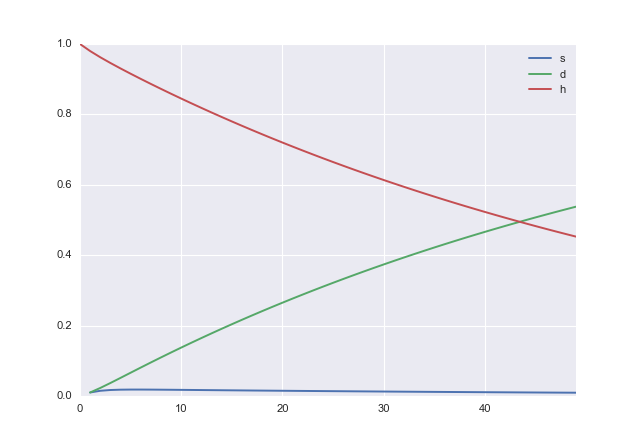

In [72]:
c.T.plot()

In [76]:
c = c.T.fillna(0)

In [77]:
c.head()

,s,d,h
0,0.000000,0.000000,1.000000
1,0.010000,0.010000,0.980000
2,0.014800,0.022800,0.962400
3,0.017024,0.036864,0.946112
4,0.017973,0.051432,0.930595


In [ ]:
def utility_sum(df):
    

In [78]:
c['uh'] = c.h * 0.8
c['us'] = c.s * 0.3
c['ud'] = c.d * 0

In [79]:
#sum utility in this situation
c.uh.sum() + c.us.sum()

27.73624858470061

In [80]:
c.tail()

,s,d,h,uh,us,ud
45,0.009971,0.507312,0.482718,0.386174,0.002991,0.0
46,0.009813,0.515130,0.475057,0.380046,0.002944,0.0
47,0.009657,0.522824,0.467519,0.374015,0.002897,0.0
48,0.009504,0.530397,0.460100,0.368080,0.002851,0.0
49,0.009353,0.537849,0.452799,0.362239,0.002806,0.0


In [83]:
a = T.pow(p, 1)
dict(a)

{'d': 0.01, 'h': 0.97999999999999998, 's': 0.01}

In [55]:
np.array(list(a.values()))

array([  3.33265817e-04,   9.99659850e-01,   6.88379261e-06])

In [56]:
from collections import OrderedDict
b = OrderedDict(a)

In [64]:
T.keys()

odict_keys([('s', 'd'), ('d', 'd'), ('s', 'h'), ('h', 'h'), ('h', 's'), ('h', 'd'), ('s', 's')])

In [30]:
c = pd.DataFrame(b)

PandasError: DataFrame constructor not properly called!

In [72]:
T.move('d')

'd'

In [40]:
T = pykov.Chain({('A','B'): .3, ('A','A'): .7, ('B','A'): 1.})
p = pykov.Vector(A=1)
T.pow(p,3)


Vector([('B', 0.23699999999999996), ('A', 0.7629999999999999)])

In [ ]:
pykov.readmat()

In [ ]:
pykov.readtrj()

In [76]:
mc.is_irreducible

False

In [78]:
from quantecon import mc_compute_stationary, mc_sample_path


In [84]:
x = mc_sample_path(P, init = 0, sample_size = 100)

In [85]:
x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [86]:
import quantecon as qe

In [88]:
mc.stationary_distributions

array([[ 0.,  0.,  1.]])

In [29]:
a = nx.adj_matrix(g, weight = 'p')
print(a)

  (0, 0)	1.0
  (1, 0)	0.01
  (1, 1)	0.98
  (1, 2)	0.01
  (2, 0)	0.3
  (2, 1)	0.2
  (2, 2)	0.5


In [30]:
a

<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [29]:
p = {}

for u,v,d in g.edges(data=True):
    p[u,v] = d['p']
    print(u,v,d)

sick sick {'p': 0.1}
sick dead {'p': 0.1}
healthy sick {'p': 0.1}
healthy healthy {'p': 0.1}
healthy dead {'p': 0.1}


Some notes
Use weight instead of p?
labels for transition matrix? (order of nodes)

In [41]:
a.todense()

matrix([[ 0.9,  0. ,  0.1],
        [ 0.1,  0.1,  0.1],
        [ 0. ,  0. ,  0. ]])

In [40]:
g.edges(data=True)

[('sick', 'sick'),
 ('sick', 'dead'),
 ('healthy', 'sick'),
 ('healthy', 'healthy'),
 ('healthy', 'dead')]

In [48]:
nx.to_numpy_matrix(g, weight = 'p')

matrix([[ 0.9,  0. ,  0.1],
        [ 0.1,  0.1,  0.1],
        [ 0. ,  0. ,  0. ]])

In [46]:
g.nodes()

['sick', 'healthy', 'dead']

In [7]:
from graphviz import Digraph

In [8]:
fig = Digraph(name = 'Markov model')

In [9]:
fig.node('h', 'healthy')
fig.node('s', 'sick')
fig.node('d', 'dead')
fig.edges(['hs', 'hh','sd'])

In [10]:
print(fig.source)

digraph "Markov model" {
	h [label=healthy]
	s [label=sick]
	d [label=dead]
		h -> s
		h -> h
		s -> d
}


In [11]:
fig.render('testgraphviz', view=True)

'testgraphviz.pdf'

In [2]:
benefits = np.random.normal(5,5,100)
costs = np.random.normal(200000,100000,100)

In [3]:
cost_per_qaly = costs/benefits

<IPython.core.display.Javascript object>


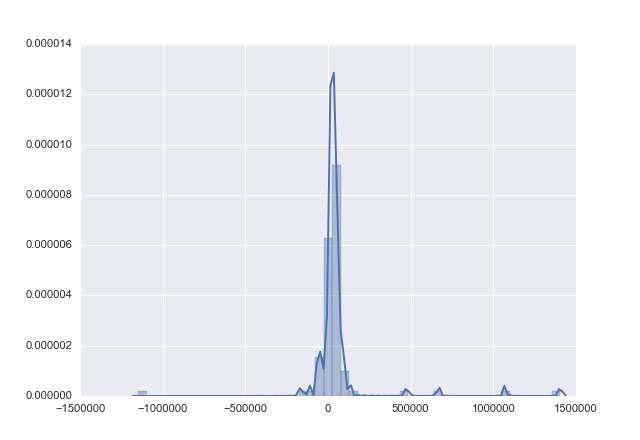

In [5]:
sns.distplot(cost_per_qaly)

In [11]:
df = pd.DataFrame([benefits, costs]).T
df.columns = ['benefits', 'costs']
df.head()

,benefits,costs
0,-2.547198,141999.125844
1,4.615314,148196.805351
2,6.324069,294089.077493
3,12.218762,265154.714121
4,5.369894,124443.255007


<IPython.core.display.Javascript object>


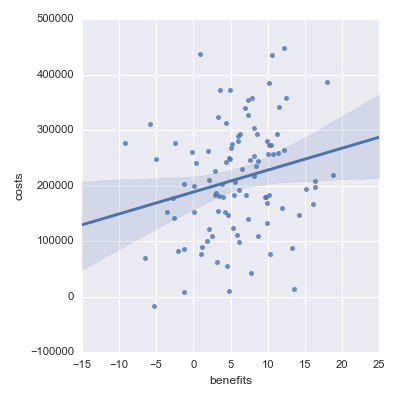

In [35]:
sns.lmplot(x='benefits', y='costs', data = df)


In [51]:
from bokeh.charts import Scatter
from bokeh.io import show, output_notebook, push_notebook
output_notebook()

Loading BokehJS ...

In [23]:
p = Scatter(x='benefits', y='costs', data = df)
show(p)


In [29]:

def colorize(x):
    sign = 1
    if costs[x]<0:
        sign = 3
    if benefits[x]>0:
        sign = sign + 1
    else:
        sign = sign * -1
    return sign
color = [colorize(x) for x in df.index] 
df['color'] = color

In [30]:
p = Scatter(x='benefits', y='costs', color = 'color', data = df)
show(p)


In [64]:
def simulate(bm = 5, cm = 200000, bsd = 5, csd = 100000, threshold = 500000):
    benefits = np.random.normal(bm,bsd,1000)
    costs = np.random.normal(cm,csd,1000)
    df = df = pd.DataFrame([benefits, costs]).T
    df.columns = ['benefits', 'costs']
    df['cost_per_qaly'] = df.costs / df.benefits
    print("Average cost per qaly: ", int(df.cost_per_qaly.mean()))
    below = len(df.cost_per_qaly[df.cost_per_qaly < threshold])
    accept = (below/len(df)) * 100
    print("Percent Accepted: ", int(accept))
    
    
    

In [65]:
interactive(simulate)

Average cost per qaly:  31825
Percent Accepted:  100


In [49]:
def simulate(bm = 5, cm = 200000, bsd = 5, csd = 100000, threshold = 500000):
    benefits = np.random.normal(bm,bsd,100)
    costs = np.random.normal(cm,csd,100)
    df = pd.DataFrame([benefits, costs]).T
    df.columns = ['benefits', 'costs']
    color = [colorize(x) for x in df.index] 
    df['color'] = color
    df['cost_per_qaly'] = df.costs / df.benefits
    sns.lmplot(x='benefits', y='costs', data = df)
    print(df.cost_per_qaly.mean())
    below = len(df.cost_per_qaly[df.cost_per_qaly < threshold])
    accept = (below/len(df)) * 100
    print(accept)
    
    

<IPython.core.display.Javascript object>


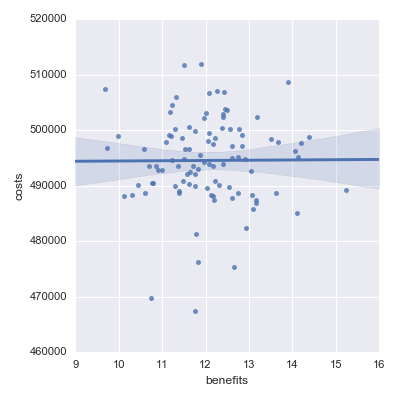

41388.10973930155
0.0


In [50]:
interactive(simulate)

Economic evaluation of different health interventions currently use many different methods and tools. The evaluations are often complex, time-consuming, expensive and the results are difficult to reproduce.

The methods include:
* Decision trees
* State transition models (Markov)
* Discrete Event Simulations 
* Agent Based Models
* Compartment models

The tools used to build these models include:
* Excel
* Proprietary software (eg. TreeAge)
* Custom made computer programs for a specific disease or method 
   



2. PROS AND CON
PRINCIPLE
- NON-LINEAR EFFECT
- HETEROGENEITY
- NON-STATIONARITY

Another article:
    - "Mean" approach ingores changign populations and transition probabilities
    - Competing risk problem 
    
COHORT VS. MICRO-SIM

PRACTICAL
ROBUST, FLEXIBLE, FAST, SIMPLE, REPRODUCIBLE

LIMITATIONS
INCREASED FIRST ORDER UNCERTAINTY

EXAMPLES
INFECTIOUS DISEASE
OVERDOSE DEATHS
LIVER DISEASE
BREAST CANCER, GENETIC TEST

PRACTICAL
